In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot

from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

#for standardising data
from sklearn.preprocessing import StandardScaler

<Figure size 1200x640 with 0 Axes>

In [2]:
df =  pd.read_csv('/Users/harveyjiang/Desktop/JJCC_Data_Analytics/jjcc_v1.csv')
pd.set_option('display.max_columns', None)

### EDA

In [3]:
df = df[['签定日期','预计合同价']]
df.rename(columns={'签定日期': 'Date', '预计合同价': 'Sales'}, inplace=True)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.groupby(pd.Grouper(key='Date', axis=0, 
                      freq='M', sort=True)).sum()

In [5]:
print(df.info())
print(df.head(50))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2018-09-30 to 2021-08-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes
None
                  Sales
Date                   
2018-09-30   1330000.00
2018-10-31   2912372.00
2018-11-30    746438.00
2018-12-31    952219.00
2019-01-31   1228978.00
2019-02-28         0.00
2019-03-31   2790382.00
2019-04-30   4269599.00
2019-05-31   4193491.00
2019-06-30   3772655.00
2019-07-31   1677344.00
2019-08-31   1234369.00
2019-09-30   3057774.51
2019-10-31   5129425.00
2019-11-30   2788968.00
2019-12-31   4164864.00
2020-01-31    311667.00
2020-02-29         0.00
2020-03-31   2462936.20
2020-04-30   4361472.70
2020-05-31   6932800.00
2020-06-30   2324450.80
2020-07-31   4747325.70
2020-08-31   5392009.78
2020-09-30   4259594.00
2020-10-31   5649801.30
2020-11-30   4902659.13
2020-12-31   

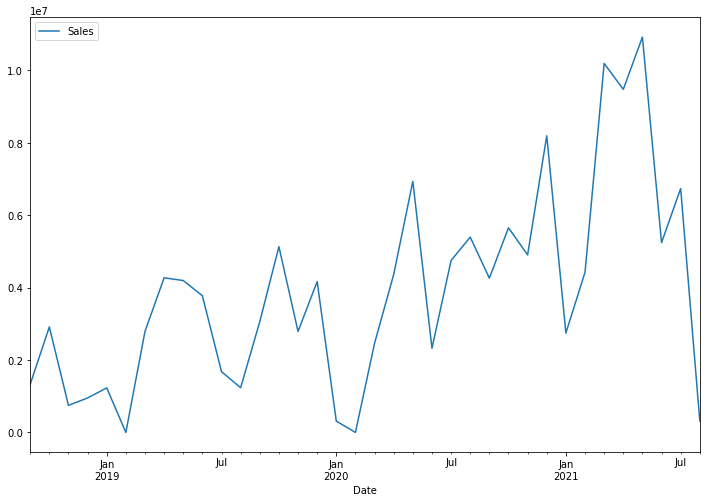

In [6]:
df.plot(figsize=(12,8))
plt.show()

#### Checking data autocorrelations via plot

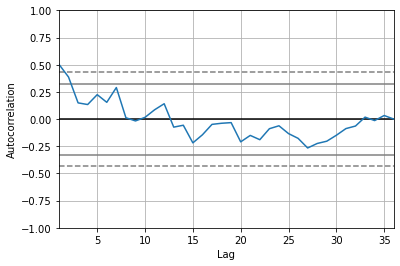

In [7]:
x = pd.plotting.autocorrelation_plot(df)
x.plot()
plt.show()

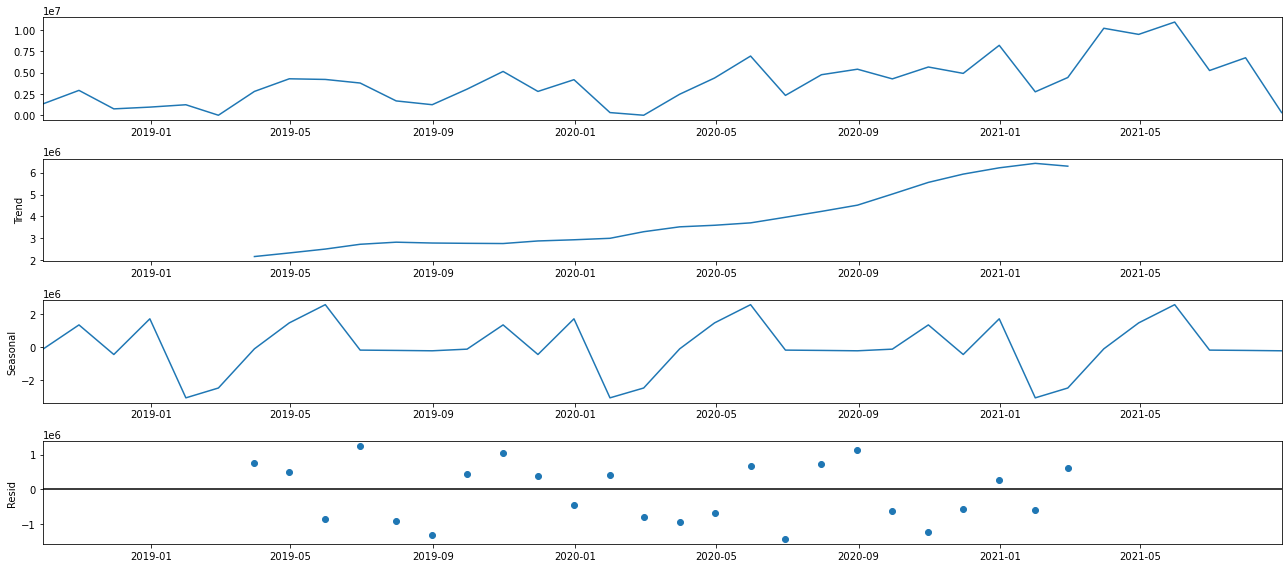

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

### Grid search ARIMA parameters

In [8]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test,predictions))
    return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float64')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.2f' %(order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.2f' %(best_cfg, best_score))
    

In [9]:
p_values = [0, 1, 2, 4, 6, 8, 10, 12]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=4024103.28
ARIMA(0, 0, 1) RMSE=3658185.77
ARIMA(0, 0, 2) RMSE=3474127.70
ARIMA(0, 1, 0) RMSE=3496624.06
ARIMA(0, 1, 1) RMSE=3344263.29
ARIMA(0, 1, 2) RMSE=3339609.34
ARIMA(0, 2, 0) RMSE=5467401.31
ARIMA(0, 2, 1) RMSE=3579179.51
ARIMA(0, 2, 2) RMSE=3469822.12
ARIMA(1, 0, 0) RMSE=3408165.38
ARIMA(1, 0, 1) RMSE=3495066.52
ARIMA(1, 0, 2) RMSE=3796004.64
ARIMA(1, 1, 0) RMSE=3303135.51
ARIMA(1, 1, 1) RMSE=3307378.52
ARIMA(1, 1, 2) RMSE=3431167.72
ARIMA(1, 2, 0) RMSE=4185935.95
ARIMA(1, 2, 1) RMSE=3386447.40
ARIMA(1, 2, 2) RMSE=3427092.30
ARIMA(2, 0, 0) RMSE=3409706.45
ARIMA(2, 0, 1) RMSE=3548060.81
ARIMA(2, 0, 2) RMSE=4044814.75
ARIMA(2, 1, 0) RMSE=3504969.05
ARIMA(2, 1, 1) RMSE=3459854.90
ARIMA(2, 1, 2) RMSE=3481801.27
ARIMA(2, 2, 0) RMSE=4038280.60
ARIMA(2, 2, 1) RMSE=3589554.04
ARIMA(2, 2, 2) RMSE=3434520.77
ARIMA(4, 0, 0) RMSE=3848756.43
ARIMA(4, 0, 1) RMSE=3880409.04
ARIMA(4, 0, 2) RMSE=3510396.00
ARIMA(4, 1, 0) RMSE=3532193.33
ARIMA(4, 1, 1) RMSE=3625771.56
ARIMA(4,

### Fitting the ARIMA Model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                ARIMA(12, 1, 0)   Log Likelihood                -553.330
Date:                Mon, 16 Aug 2021   AIC                           1132.660
Time:                        15:07:19   BIC                           1152.879
Sample:                    09-30-2018   HQIC                          1139.640
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2636      0.260     -1.013      0.311      -0.773       0.246
ar.L2         -0.2572      0.281     -0.917      0.359      -0.807       0.293
ar.L3         -0.2083      0.270     -0.773      0.4

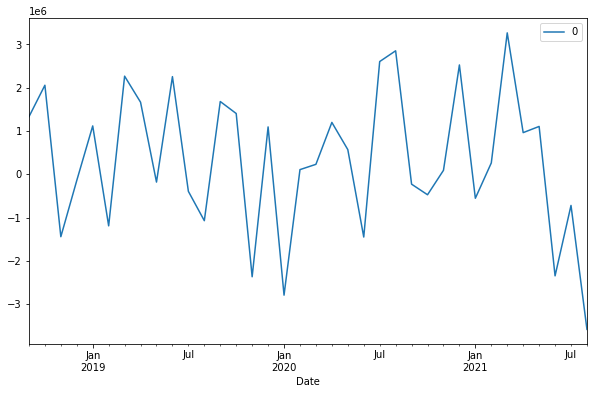

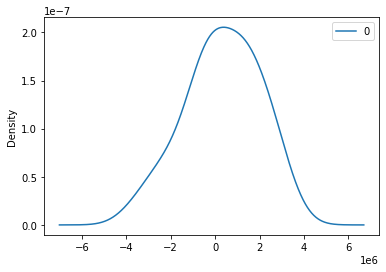

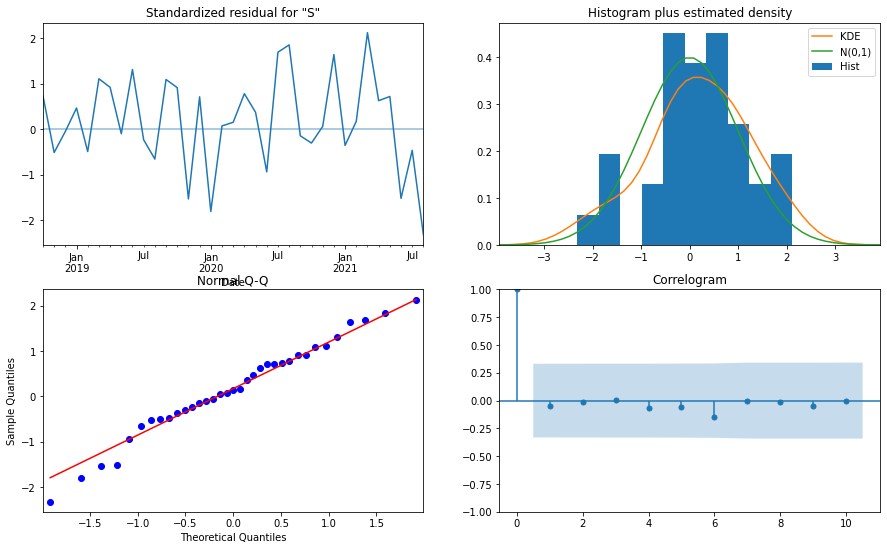

In [10]:
model = ARIMA(df, order=(12,1,0))
model_fit = model.fit()
print(model_fit.summary())

# showing residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (10,6))
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

model_fit.plot_diagnostics(figsize = (15,9))
plt.show()

#### Forecasting with ARIMA

predicted=4747326.029944, expected=5392009.780000
predicted=5392010.555027, expected=4259594.000000
predicted=4259595.103318, expected=5649801.300000
predicted=6513054.273802, expected=4902659.130000
predicted=4680080.808869, expected=8190096.510000
predicted=3951514.437396, expected=2743990.000000
predicted=2016714.541523, expected=4419288.120000
predicted=5448899.499892, expected=10187402.630000
predicted=7060365.926783, expected=9471274.540000
predicted=9437605.274976, expected=10914530.370000
predicted=7912807.693453, expected=5239469.710000
predicted=8216295.961820, expected=6732630.880000
predicted=6766913.723414, expected=315677.000000
Test RMSE: 2871455.93


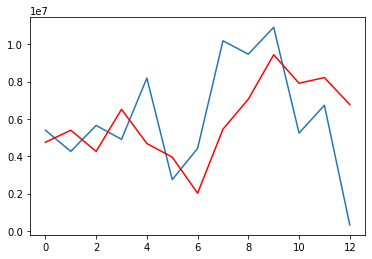

In [11]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(12,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' %(yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.2f' % rmse)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()